## Data Preprocessing for Binary Classification Problem

In [1]:
# Packages/imports here.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [ ]:
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
#Read the 2 datasets
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Preprocessing

In [3]:
df1.shape #dimensions of train dataset

(33000, 19)

In [4]:
df2.shape #dimensions of test dataset

(5000, 19)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user          5000 non-null   int64 
 1   session       5000 non-null   object
 2   query         5000 non-null   object
 3   timestamp     5000 non-null   object
 4   search        5000 non-null   object
 5   rank          5000 non-null   int64 
 6   serp          5000 non-null   int64 
 7   hour          5000 non-null   int64 
 8   day           5000 non-null   object
 9   month         5000 non-null   object
 10  dwell         5000 non-null   int64 
 11  new-sub       5000 non-null   int64 
 12  premium-pack  5000 non-null   int64 
 13  source        5000 non-null   object
 14  type          5000 non-null   object
 15  nature        4281 non-null   object
 16  cpvs          5000 non-null   object
 17  #cpv45        5000 non-null   int64 
 18  Id            5000 non-null   int64 
dtypes: int

In [6]:
df1.isnull().sum() #checking for null values in train dataset

user                0
session             0
query               0
timestamp           0
search              0
rank                0
serp                0
hour                0
day                 0
month               0
dwell               0
new-sub             0
premium-pack        0
psrel               0
source              0
type                0
nature          11402
cpvs                0
#cpv45              0
dtype: int64

In [7]:
df2.isnull().sum() #checking for null values in test dataset

user              0
session           0
query             0
timestamp         0
search            0
rank              0
serp              0
hour              0
day               0
month             0
dwell             0
new-sub           0
premium-pack      0
source            0
type              0
nature          719
cpvs              0
#cpv45            0
Id                0
dtype: int64

In [8]:
df=pd.concat([df1,df2],axis=0) #concatinating train and test set for preprocessing

In [9]:
df.shape #dimensions of concatenated dataset

(38000, 20)

In [10]:
df.isnull().sum() # checking for null values in the concatenated dataset 'df'

user                0
session             0
query               0
timestamp           0
search              0
rank                0
serp                0
hour                0
day                 0
month               0
dwell               0
new-sub             0
premium-pack        0
psrel            5000
source              0
type                0
nature          12121
cpvs                0
#cpv45              0
Id              33000
dtype: int64

In [11]:
df.isnull().sum()*100/len(df) #observing null values as a % of total length of dataset 

user             0.000000
session          0.000000
query            0.000000
timestamp        0.000000
search           0.000000
rank             0.000000
serp             0.000000
hour             0.000000
day              0.000000
month            0.000000
dwell            0.000000
new-sub          0.000000
premium-pack     0.000000
psrel           13.157895
source           0.000000
type             0.000000
nature          31.897368
cpvs             0.000000
#cpv45           0.000000
Id              86.842105
dtype: float64

In [12]:
df['nature'].value_counts() # categories under attribute 'nature'

services    18353
supplies     4160
works        3366
Name: nature, dtype: int64

In [13]:
# Replacing missing values with the dominant category (services)
df['nature']=df['nature'].fillna(df['nature'].mode()[0])

## **(A) Numerical Feature Handling**

In [14]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()  #looking for numerical features in dataset - id is only for test set and kaggle submission

Number of numerical variables:  10


,user,rank,serp,hour,dwell,new-sub,premium-pack,psrel,#cpv45,Id
0,8438057,1,1,10,1,1,0,0.0,1,NaN
1,8438876,75,8,10,10,1,0,0.0,2,NaN
2,922102585,4,1,9,21,1,0,0.0,2,NaN
3,2105483652,66,4,14,21,0,0,0.0,2,NaN
4,8438876,81,9,10,20,1,0,0.0,1,NaN


## **(B) Categorical Feature Handling**

In [15]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['session',
 'query',
 'timestamp',
 'search',
 'day',
 'month',
 'source',
 'type',
 'nature',
 'cpvs']

In [16]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is session and number of categories are 9164
The feature is query and number of categories are 14452
The feature is timestamp and number of categories are 37553
The feature is search and number of categories are 4
The feature is day and number of categories are 7
The feature is month and number of categories are 6
The feature is source and number of categories are 12
The feature is type and number of categories are 4
The feature is nature and number of categories are 3
The feature is cpvs and number of categories are 11091


In [17]:
# Label Encoding all categorical attributes
for feature in categorical_features:
    label_enc = LabelEncoder()
    int_encode = label_enc.fit_transform(df[feature])
    print(int_encode)
    df[feature] = int_encode

[5834 3351 4465 ... 2520 2520 2832]
[11924  4457  1266 ... 13108 13108  6475]
[28848   154  5541 ... 37339 37349 37319]
[2 3 0 ... 2 2 3]
[5 5 6 ... 4 4 4]
[5 2 1 ... 3 3 3]
[7 1 1 ... 5 7 7]
[2 2 2 ... 2 1 1]
[0 0 0 ... 0 0 0]
[ 7623 10098 10098 ... 11090 10287 10383]


In [18]:
df.shape

(38000, 20)

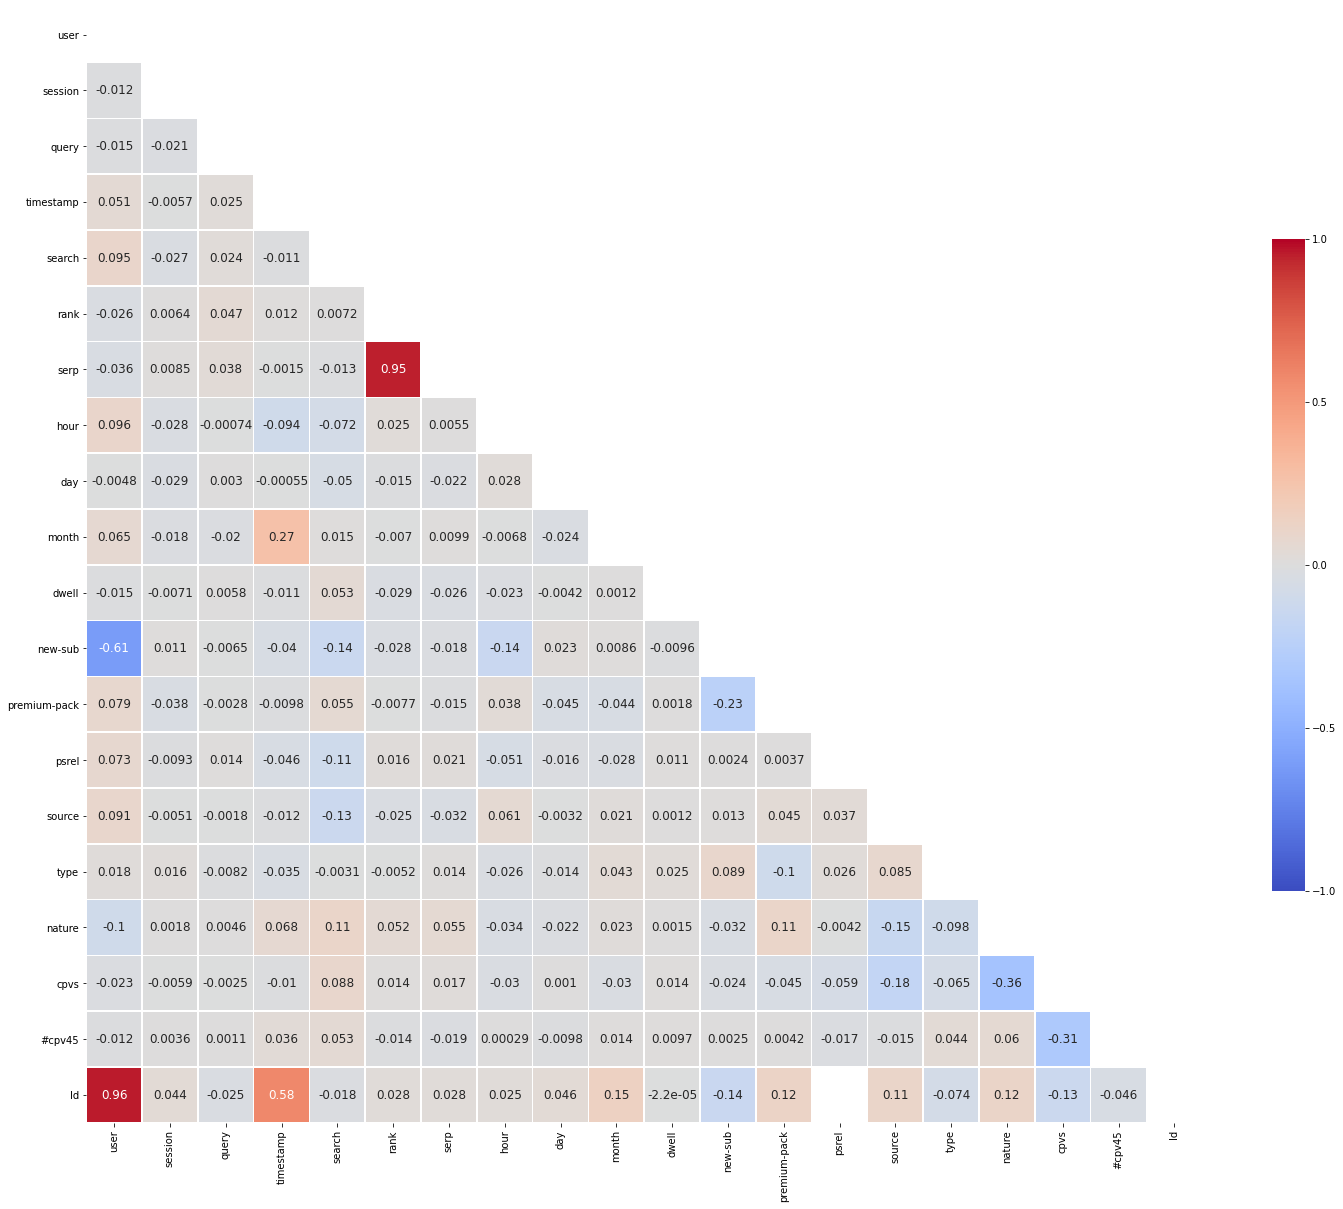

In [19]:
#heatmap visualisation for the correlations

def corr_heatmap(data):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    f, ax = plt.subplots(figsize=(25, 30)) 
    heatmap = sns.heatmap(corr_matrix, 
                          mask = mask,
                          square = True,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, 
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 12}) #add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
    
corr_heatmap(df)

In [20]:
# Checking for multicollinearity
threshold=0.8
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

correlation(df,threshold)

{'Id', 'serp'}

In [21]:
#Split datasets to train and test as before
train=df.iloc[:33000,:]

In [22]:
train=train.drop(columns=['Id'])

In [23]:
test=df.iloc[33000:,:]

In [24]:
test=test.drop(columns=['psrel'])

In [25]:
#Convert id to integer type
test['Id'] =test['Id'].astype(int)

In [26]:
#Extract training dataset for the binary classification task without data augmentation
train.to_csv('train_dataset_task1.csv')

In [27]:
#Extract test dataset for the binary classification task
test.to_csv('test_dataset_task1.csv')

In [28]:
#from google.colab import drive
#drive.mount('/content/drive')